In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import random, shutil
import pickle

In [2]:
import numpy
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_first')
from keras.models import model_from_json

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [415]:
directory = r'D:/SD/Input_fin'
os.chdir(directory)

In [345]:
img = cv2.imread('D:/SD/test.jpeg')
img1 = cv2.imread('D:/SD/0_1315.jpg')
img2 = cv2.imread('D:/SD/Eq_c4.jpeg')

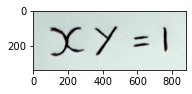

In [346]:
plt.subplot(1, 2, 1); plt.imshow(img2)

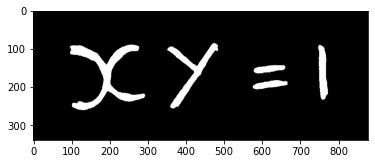

In [347]:
img_gray1 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

a1 = img_gray1.max()  
_, thresh1 = cv2.threshold(img_gray1, a1/2+60, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh1, cmap = 'gray')

In [348]:
ctrs1,ret1=cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [349]:
print(len(ctrs1))

5


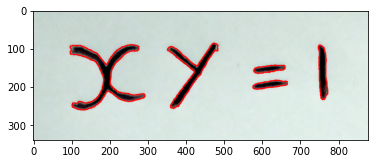

In [350]:
# Sort the contours 
cnt1=sorted(ctrs1, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Draw the contour 
img_copy1 = img2.copy()
final1 = cv2.drawContours(img_copy1, cnt1, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(img_copy1)

In [351]:
sep=[]
for contour in cnt1:

    ext_left = tuple(contour[contour[:, :, 0].argmin()][0])
    ext_right = tuple(contour[contour[:, :, 0].argmax()][0])
    ext_top = tuple(contour[contour[:, :, 1].argmin()][0])
    ext_bot = tuple(contour[contour[:, :, 1].argmax()][0])

    cropped_image1 = img2[ext_top[1]:ext_bot[1], ext_left[0]:ext_right[0]]
    sep.append(cropped_image1)

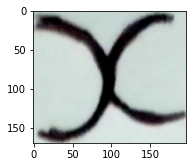

In [352]:
plt.subplot(1, 2, 1); plt.imshow(sep[0])

In [353]:
res = []
for i in sep:
    ht, wd, cc= i.shape

    # create new image of desired size and color (blue) for padding
    ww = 280
    hh = 280
    color = (255,255,255)
    result = np.full((hh,ww,cc), color, dtype=np.uint8)

    # compute center offset
    xx = (ww - wd) // 2
    yy = (hh - ht) // 2

    # copy img image into center of result image
    result[yy:yy+ht, xx:xx+wd] = i
    
    res.append(result)

In [354]:
arr = np.concatenate((res[2], res[3]))

In [355]:
print(arr.shape)

(560, 280, 3)


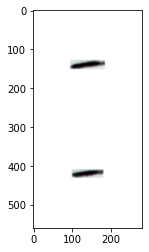

In [356]:
plt.subplot(1, 2, 1); plt.imshow(arr)

In [392]:
fin = []
fin.append(res[0])
fin.append(res[1])
fin.append(arr)
fin.append(res[4])

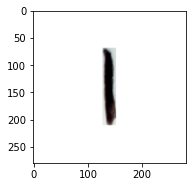

In [396]:
plt.subplot(1, 2, 1); plt.imshow(fin[3])

In [424]:
k = []
for i in fin:
    im_resize = cv2.resize(i,(28,28))
    k.append(im_resize)

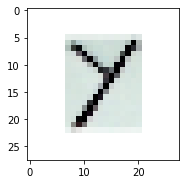

In [425]:
plt.subplot(1, 2, 1); plt.imshow(k[1])

In [426]:
fname = ['1.jpg', '2.jpg', '3.jpg', '4.jpg']
for i in range(len(k)):
    cv2.imwrite(fname[i],k[i])